<a href="https://colab.research.google.com/github/yzhou359/MakeItTalk/blob/main/quick_demo_tdlr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MakeItTalk Quick Demo (natural human face animation)

## TDLR version

Remember to change to GPU runtime first!

## Preparation (run only once)

In [1]:
print('Git clone project and install requirements...')

!pip install gdown
print('Done!')
print('Download pre-trained models...')
!gdown -O examples/ckpt/ckpt_autovc.pth https://drive.google.com/uc?id=1ZiwPp_h62LtjU0DwpelLUoodKPR85K7x
!gdown -O examples/ckpt/ckpt_content_branch.pth https://drive.google.com/uc?id=1r3bfEvTVl6pCNw5xwUhEglwDHjWtAqQp
!gdown -O examples/ckpt/ckpt_speaker_branch.pth https://drive.google.com/uc?id=1rV0jkyDqPW-aDJcj7xSO6Zt1zSXqn1mu
!gdown -O examples/ckpt/ckpt_116_i2i_comb.pth https://drive.google.com/uc?id=1i2LJXKp-yWKIEEgJ7C6cE3_2NirfY_0a
!gdown -O examples/dump/emb.pickle https://drive.google.com/uc?id=18-0CYl5E6ungS3H4rRSHjfYvvm-WwjTI
print('Done!')

Git clone project and install requirements...
Done!
Download pre-trained models...
zsh:1: no matches found: https://drive.google.com/uc?id=1ZiwPp_h62LtjU0DwpelLUoodKPR85K7x
zsh:1: no matches found: https://drive.google.com/uc?id=1r3bfEvTVl6pCNw5xwUhEglwDHjWtAqQp
zsh:1: no matches found: https://drive.google.com/uc?id=1rV0jkyDqPW-aDJcj7xSO6Zt1zSXqn1mu
zsh:1: no matches found: https://drive.google.com/uc?id=1i2LJXKp-yWKIEEgJ7C6cE3_2NirfY_0a
zsh:1: no matches found: https://drive.google.com/uc?id=18-0CYl5E6ungS3H4rRSHjfYvvm-WwjTI
Done!


## Animate your photos here!

- Upload your images to `examples` with size `256x256`. Or use existing ones.

- Upload your speech audio files (could be many) to `examples`. Since it will process all `.wav` files under `examples`, remember to delete non-necessary `.wav` files. Or use an existing one `M6_04_16k.wav`.

## Step 1/3: Choose your image (in below Dropdown). 

Choose the image name to animate: (saved in folder 'examples/')


Dropdown(index=41, options=('angelina', 'anne', 'anne2', 'audrey', 'aya', 'captain', 'captain2', 'cesi', 'chri…

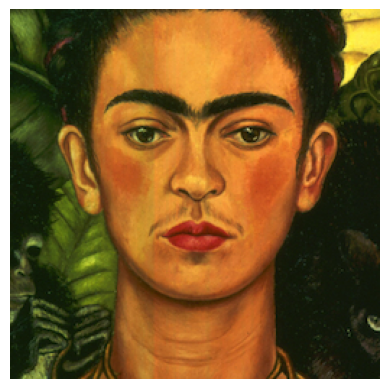

In [1]:
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples/')")
img_list = glob.glob1('examples', '*.jpg')
img_list.sort()
img_list = [item.split('.')[0] for item in img_list]
default_head_name = widgets.Dropdown(options=img_list, value='paint_boy')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples/{}.jpg'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples/{}.jpg'.format(default_head_name.value)))
plt.axis('off')
plt.show()

## Step 2/3: Setup your animation controllers (on right Sliders).

In [2]:
#@markdown # Animation Controllers
#@markdown Amplify the lip motion in horizontal direction
AMP_LIP_SHAPE_X = 2 #@param {type:"slider", min:0.5, max:5.0, step:0.1}

#@markdown Amplify the lip motion in vertical direction
AMP_LIP_SHAPE_Y = 2 #@param {type:"slider", min:0.5, max:5.0, step:0.1}

#@markdown Amplify the head pose motion (usually smaller than 1.0, put it to 0. for a static head pose)
AMP_HEAD_POSE_MOTION = 0.35 #@param {type:"slider", min:0.0, max:1.0, step:0.05}

#@markdown Add naive eye blink
ADD_NAIVE_EYE = True  #@param ["False", "True"] {type:"raw"}

#@markdown If your image has an opened mouth, put this as True, else False
CLOSE_INPUT_FACE_MOUTH = False  #@param ["False", "True"] {type:"raw"}          


#@markdown # Landmark Adjustment

#@markdown Adjust upper lip thickness (postive value means thicker)
UPPER_LIP_ADJUST = -1 #@param {type:"slider", min:-3.0, max:3.0, step:1.0}

#@markdown Adjust lower lip thickness (postive value means thicker)
LOWER_LIP_ADJUST = -1 #@param {type:"slider", min:-3.0, max:3.0, step:1.0}

#@markdown Adjust static lip width (in multipication)
LIP_WIDTH_ADJUST = 1.0 #@param {type:"slider", min:0.8, max:1.2, step:0.01}

## Step 3/3: One-click to Run (just wait in seconds).

In [15]:
!python3 --version
!pip list


Python 3.6.13 :: Anaconda, Inc.
Package             Version
------------------- -----------
beautifulsoup4      4.12.3
certifi             2021.5.30
charset-normalizer  2.0.12
dataclasses         0.8
filelock            3.4.1
gdown               4.7.3
idna                3.8
importlib-resources 5.4.0
mkl-fft             1.3.0
mkl-random          1.1.1
mkl-service         2.3.0
numpy               1.19.5
olefile             0.46
packaging           21.3
Pillow              8.4.0
pip                 21.2.2
protobuf            4.21.0
pydub               0.25.1
pyparsing           3.1.4
PySocks             1.7.1
requests            2.27.1
setuptools          58.0.4
six                 1.16.0
soupsieve           2.3.2.post1
tensorboardX        2.6.2.2
torch               1.10.2
torchaudio          0.10.2
torchvision         0.11.3
tqdm                4.64.1
typing_extensions   4.1.1
urllib3             1.26.20
wheel               0.37.1
zipp                3.6.0


In [11]:
import sys
sys.path.append("thirdparty/AdaptiveWingLoss")
import os, glob
import numpy as np
import cv2
import argparse
from src.approaches.train_image_translation import Image_translation_block
import torch
import pickle
import face_alignment
from src.autovc.AutoVC_mel_Convertor_retrain_version import AutoVC_mel_Convertor
import shutil
import time
import util.utils as util
from scipy.signal import savgol_filter
from src.approaches.train_audio2landmark import Audio2landmark_model

sys.stdout = open(os.devnull, 'a')

parser = argparse.ArgumentParser()
parser.add_argument('--jpg', type=str, default='{}.jpg'.format(default_head_name.value))
parser.add_argument('--close_input_face_mouth', default=CLOSE_INPUT_FACE_MOUTH, action='store_true')
parser.add_argument('--load_AUTOVC_name', type=str, default='examples/ckpt/ckpt_autovc.pth')
parser.add_argument('--load_a2l_G_name', type=str, default='examples/ckpt/ckpt_speaker_branch.pth')
parser.add_argument('--load_a2l_C_name', type=str, default='examples/ckpt/ckpt_content_branch.pth') #ckpt_audio2landmark_c.pth')
parser.add_argument('--load_G_name', type=str, default='examples/ckpt/ckpt_116_i2i_comb.pth') #ckpt_image2image.pth') #ckpt_i2i_finetune_150.pth') #c
parser.add_argument('--amp_lip_x', type=float, default=AMP_LIP_SHAPE_X)
parser.add_argument('--amp_lip_y', type=float, default=AMP_LIP_SHAPE_Y)
parser.add_argument('--amp_pos', type=float, default=AMP_HEAD_POSE_MOTION)
parser.add_argument('--reuse_train_emb_list', type=str, nargs='+', default=[]) #  ['iWeklsXc0H8']) #['45hn7-LXDX8']) #['E_kmpT-EfOg']) #'iWeklsXc0H8', '29k8RtSUjE0', '45hn7-LXDX8',
parser.add_argument('--add_audio_in', default=False, action='store_true')
parser.add_argument('--comb_fan_awing', default=False, action='store_true')
parser.add_argument('--output_folder', type=str, default='examples')
parser.add_argument('--test_end2end', default=True, action='store_true')
parser.add_argument('--dump_dir', type=str, default='', help='')
parser.add_argument('--pos_dim', default=7, type=int)
parser.add_argument('--use_prior_net', default=True, action='store_true')
parser.add_argument('--transformer_d_model', default=32, type=int)
parser.add_argument('--transformer_N', default=2, type=int)
parser.add_argument('--transformer_heads', default=2, type=int)
parser.add_argument('--spk_emb_enc_size', default=16, type=int)
parser.add_argument('--init_content_encoder', type=str, default='')
parser.add_argument('--lr', type=float, default=1e-3, help='learning rate')
parser.add_argument('--reg_lr', type=float, default=1e-6, help='weight decay')
parser.add_argument('--write', default=False, action='store_true')
parser.add_argument('--segment_batch_size', type=int, default=1, help='batch size')
parser.add_argument('--emb_coef', default=3.0, type=float)
parser.add_argument('--lambda_laplacian_smooth_loss', default=1.0, type=float)
parser.add_argument('--use_11spk_only', default=False, action='store_true')
parser.add_argument('-f')
opt_parser = parser.parse_args()

img = cv2.imread('examples/' + opt_parser.jpg)
predictor = face_alignment.FaceAlignment(face_alignment.LandmarksType.THREE_D, device='cpu', flip_input=True)
shapes = predictor.get_landmarks(img)
if (not shapes or len(shapes) != 1):
    print('Cannot detect face landmarks. Exit.')
    exit(-1)
shape_3d = shapes[0]
if(opt_parser.close_input_face_mouth):
    util.close_input_face_mouth(shape_3d)
shape_3d[48:, 0] = (shape_3d[48:, 0] - np.mean(shape_3d[48:, 0])) * LIP_WIDTH_ADJUST + np.mean(shape_3d[48:, 0]) # wider lips
shape_3d[49:54, 1] -= UPPER_LIP_ADJUST           # thinner upper lip
shape_3d[55:60, 1] += LOWER_LIP_ADJUST           # thinner lower lip
shape_3d[[37,38,43,44], 1] -=2.    # larger eyes
shape_3d[[40,41,46,47], 1] +=2.    # larger eyes
shape_3d, scale, shift = util.norm_input_face(shape_3d)

print("Loaded Image...", file=sys.stderr)

au_data = []
au_emb = []
ains = glob.glob1('examples', '*.wav')
ains = [item for item in ains if item is not 'tmp.wav']
ains.sort()
print("****")
print(ains)
for ain in ains:
    os.system('ffmpeg -y -loglevel error -i examples/{} -ar 16000 examples/tmp.wav'.format(ain))
    shutil.copyfile('examples/tmp.wav', 'examples/{}'.format(ain))

    # au embedding
    from thirdparty.resemblyer_util.speaker_emb import get_spk_emb
    me, ae = get_spk_emb('examples/{}'.format(ain))
    au_emb.append(me.reshape(-1))

    print('Processing audio file', ain)
    c = AutoVC_mel_Convertor('examples')

    au_data_i = c.convert_single_wav_to_autovc_input(audio_filename=os.path.join('examples', ain),
           autovc_model_path=opt_parser.load_AUTOVC_name)
    au_data += au_data_i
if(os.path.isfile('examples/tmp.wav')):
    os.remove('examples/tmp.wav')

print("Loaded audio...", file=sys.stderr)

# landmark fake placeholder
fl_data = []
rot_tran, rot_quat, anchor_t_shape = [], [], []
for au, info in au_data:
    au_length = au.shape[0]
    fl = np.zeros(shape=(au_length, 68 * 3))
    fl_data.append((fl, info))
    rot_tran.append(np.zeros(shape=(au_length, 3, 4)))
    rot_quat.append(np.zeros(shape=(au_length, 4)))
    anchor_t_shape.append(np.zeros(shape=(au_length, 68 * 3)))

if(os.path.exists(os.path.join('examples', 'dump', 'random_val_fl.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_fl.pickle'))
if(os.path.exists(os.path.join('examples', 'dump', 'random_val_fl_interp.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_fl_interp.pickle'))
if(os.path.exists(os.path.join('examples', 'dump', 'random_val_au.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_au.pickle'))
if (os.path.exists(os.path.join('examples', 'dump', 'random_val_gaze.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_gaze.pickle'))

with open(os.path.join('examples', 'dump', 'random_val_fl.pickle'), 'wb') as fp:
    pickle.dump(fl_data, fp)
with open(os.path.join('examples', 'dump', 'random_val_au.pickle'), 'wb') as fp:
    pickle.dump(au_data, fp)
with open(os.path.join('examples', 'dump', 'random_val_gaze.pickle'), 'wb') as fp:
    gaze = {'rot_trans':rot_tran, 'rot_quat':rot_quat, 'anchor_t_shape':anchor_t_shape}
    pickle.dump(gaze, fp)

model = Audio2landmark_model(opt_parser, jpg_shape=shape_3d)
if(len(opt_parser.reuse_train_emb_list) == 0):
    model.test(au_emb=au_emb)
else:
    model.test(au_emb=None)

print("Audio->Landmark...", file=sys.stderr)

fls = glob.glob1('examples', 'pred_fls_*.txt')
fls.sort()

for i in range(0,len(fls)):
    fl = np.loadtxt(os.path.join('examples', fls[i])).reshape((-1, 68,3))
    fl[:, :, 0:2] = -fl[:, :, 0:2]
    fl[:, :, 0:2] = fl[:, :, 0:2] / scale - shift

    if (ADD_NAIVE_EYE):
        fl = util.add_naive_eye(fl)

    # additional smooth
    fl = fl.reshape((-1, 204))
    fl[:, :48 * 3] = savgol_filter(fl[:, :48 * 3], 15, 3, axis=0)
    fl[:, 48*3:] = savgol_filter(fl[:, 48*3:], 5, 3, axis=0)
    fl = fl.reshape((-1, 68, 3))

    ''' STEP 6: Imag2image translation '''
    model = Image_translation_block(opt_parser, single_test=True)
    with torch.no_grad():
        model.single_test(jpg=img, fls=fl, filename=fls[i], prefix=opt_parser.jpg.split('.')[0])
        print('finish image2image gen')
    os.remove(os.path.join('examples', fls[i]))

    print("{} / {}: Landmark->Face...".format(i+1, len(fls)), file=sys.stderr)
print("Done!", file=sys.stderr)

<>:74: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:74: SyntaxWarning: "is not" with a literal. Did you mean "!="?
Loaded Image...
/var/folders/gy/f15sqp854tj8_r1p_wqlvtjw0000gn/T/ipykernel_61349/2595953873.py:74: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  ains = [item for item in ains if item is not 'tmp.wav']
Loaded audio...
OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.3.9.4)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/7.0.2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --

## Visualize your animation!

In [10]:
from IPython.display import HTML
from base64 import b64encode

for ain in ains:
  OUTPUT_MP4_NAME = '{}_pred_fls_{}_audio_embed.mp4'.format(
    opt_parser.jpg.split('.')[0],
    ain.split('.')[0]
    )
  mp4 = open('examples/output/{}'.format(OUTPUT_MP4_NAME),'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

  print('Display animation: examples/{}'.format(OUTPUT_MP4_NAME), file=sys.stderr)
  display(HTML("""
  <video width=600 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))

Display animation: examples/paint_boy_pred_fls_M6_04_16k_audio_embed.mp4


FileNotFoundError: [Errno 2] No such file or directory: 'examples/output/paint_boy_pred_fls_tmp_audio_embed.mp4'